### - Sobhan Moradian Daghigh
#### - 5/23/2022
#### - Convex - HW02 - Q9

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [19]:
np.random.seed(1)

### Assumptions

In [20]:
n = 100
m = 300
A = np.random.rand(m, n)
b = np.matmul(A, np.divide(np.ones((n, 1)), 2))
c = - np.random.rand(n, 1)

### Optimization Problem

In [22]:
x = cp.Variable((n,1))
objective = cp.Minimize(np.matmul(c.T, x))
constraints = [np.matmul(A, x) <= b,x >= 0, x <= 1]
prob = cp.Problem(objective, constraints)
prob = prob.solve(qcp=True)

In [23]:
objective.value

-34.589711316657336

In [25]:
def relaxing(num, threshold):
    return 1 if num >= threshold else 0

In [40]:
thresh_nums = 100
thresholds = np.arange(0, thresh_nums) / (thresh_nums - 1)

In [106]:
maxs = []
Us = []
upper = np.inf
for thresh in thresholds:
    relaxed = np.array(list((map(lambda a: relaxing(a, threshold=thresh), x.value)))).reshape(thresh_nums, 1)
    U = np.matmul(c.T, relaxed)
    Us.append(U)
    maximum = np.max(np.matmul(A, relaxed) - b)
    maxs.append(maximum)
    
    if upper > U and maximum <= 0:
        upper = U

maxs = np.array(maxs)
Us = np.array(Us)

In [112]:
print('L: {}'.format(objective.value))
print('U: {}'.format(upper[0][0]))
print('Diff: {}'.format(upper[0][0] - objective.value))

L: -34.589711316657336
U: -33.88368852196696
Diff: 0.7060227946903765


In [107]:
upper - objective.value

array([[0.70602279]])

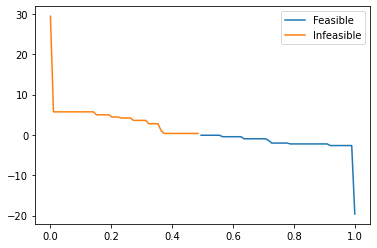

In [90]:
plt.plot(thresholds[maxs<=0], maxs[maxs<=0], label='Feasible')
plt.plot(thresholds[maxs>0], maxs[maxs>0], label='Infeasible')
plt.legend()
plt.show()

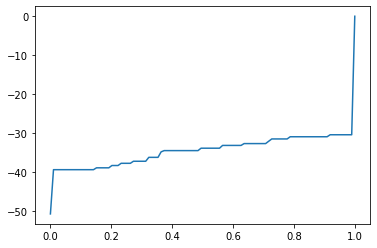

In [82]:
plt.plot(thresholds, Us.reshape(thresh_nums, 1))
plt.show()

### Finito